In [ ]:
!pip install datasets
!pip install transformers
!pip install fastapi
!pip install sentencepiece
!pip install python-multipart
!pip install uvicorn
!pip install kaleido
!pip install hazm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 473.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.0/70.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.
tensorflow-probability 0.22.0 requires typing-ext

In [ ]:
import requests
import zipfile
import io

# Replace the URL with the correct one
url = "https://github.com/dml-qom/FarsTail/archive/refs/heads/master.zip"

# Download the ZIP file
response = requests.get(url)
zipped_data = io.BytesIO(response.content)

# Extract the contents of the ZIP file
with zipfile.ZipFile(zipped_data, 'r') as zip_ref:
    zip_ref.extractall("/content/")  # Change the path as needed


In [ ]:
import pandas as pd
from datasets import Dataset, DatasetDict

train_data = pd.read_csv('/content/FarsTail-master/data/Train-word.csv', sep='\t')
val_data = pd.read_csv('/content/FarsTail-master/data/Val-word.csv', sep='\t')
test_data = pd.read_csv('/content/FarsTail-master/data/Test-word.csv', sep='\t')

ModuleNotFoundError: No module named 'datasets'

In [ ]:
import numpy as np
with np.load('/content/FarsTail-master/data/Indexed-FarsTail.npz', allow_pickle=True) as f:
    train_ind, val_ind, test_ind, dictionary = f['train_ind'], f['val_ind'], f['test_ind'], f['dictionary'].item()

# Statistical results

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine datasets for overall statistics
all_data = pd.concat([train_data, val_data, test_data])

# Class distribution
class_distribution = all_data['label'].value_counts()
print("Class Distribution:\n", class_distribution)


Class Distribution:
 n    3506
e    3463
c    3398
Name: label, dtype: int64


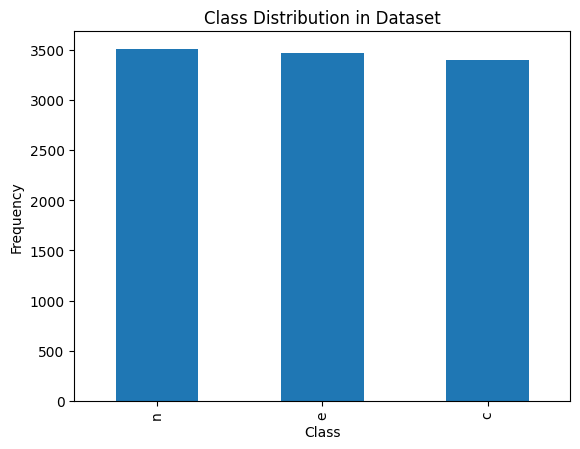

In [ ]:
# Plotting class distribution
class_distribution.plot(kind='bar')
plt.title('Class Distribution in Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Sentence length analysis
all_data['premise_length'] = all_data['premise'].apply(lambda x: len(x.split()))
all_data['hypothesis_length'] = all_data['hypothesis'].apply(lambda x: len(x.split()))

# Descriptive statistics for sentence lengths
print("Descriptive Statistics for Premise Lengths:\n", all_data['premise_length'].describe())
print("Descriptive Statistics for Hypothesis Lengths:\n", all_data['hypothesis_length'].describe())

Descriptive Statistics for Premise Lengths:
 count    10367.000000
mean        36.323816
std         15.162818
min          7.000000
25%         25.000000
50%         34.000000
75%         45.000000
max        121.000000
Name: premise_length, dtype: float64
Descriptive Statistics for Hypothesis Lengths:
 count    10367.000000
mean        13.834861
std          5.405738
min          4.000000
25%         10.000000
50%         13.000000
75%         17.000000
max         49.000000
Name: hypothesis_length, dtype: float64


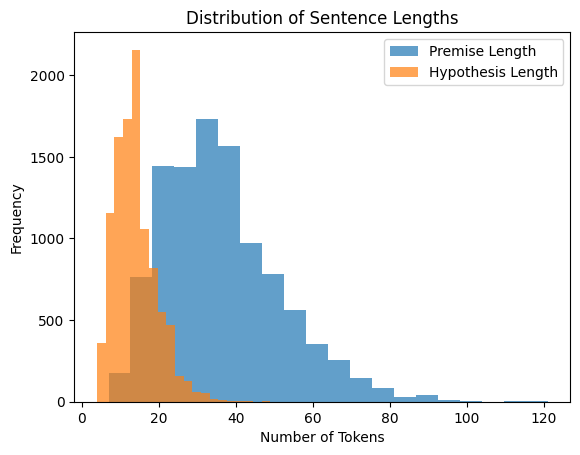

In [ ]:
# Histograms for sentence lengths
plt.hist(all_data['premise_length'], bins=20, alpha=0.7, label='Premise Length')
plt.hist(all_data['hypothesis_length'], bins=20, alpha=0.7, label='Hypothesis Length')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Pre-process

In [ ]:
import pandas as pd
import re
from hazm import Normalizer, word_tokenize

def preprocess_text(text):
    # Normalize using hazm Normalizer
    normalizer = Normalizer()
    text = normalizer.normalize(text)

    # Tokenization
    tokens = word_tokenize(text)

    # Removing special characters and numbers
    tokens = [re.sub(r'[^ا-ی]', '', token) for token in tokens]

    # Rejoin tokens into a single string
    return ' '.join(tokens)

# Applying preprocessing
train_data['premise'] = train_data['premise'].apply(preprocess_text)
train_data['hypothesis'] = train_data['hypothesis'].apply(preprocess_text)

val_data['premise'] = val_data['premise'].apply(preprocess_text)
val_data['hypothesis'] = val_data['hypothesis'].apply(preprocess_text)

test_data['premise'] = test_data['premise'].apply(preprocess_text)
test_data['hypothesis'] = test_data['hypothesis'].apply(preprocess_text)

# Saving the preprocessed data
train_data.to_csv('/content/FarsTail-master/data/Train-word-preprocessed.csv', index=False)
val_data.to_csv('/content/FarsTail-master/data/Val-word-preprocessed.csv', index=False)
test_data.to_csv('/content/FarsTail-master/data/Test-word-preprocessed.csv', index=False)


The time that is needed for preprocessing the data is too much. So, we did 1 time and save it in drive to save some time!

In [ ]:
!gdown 1rI9jfuAPSYwFmObqaIC15RDVuT58XSH4
!gdown 13DuQ_864-Hw3Neqy2Fz9WWN2OlXobt1a
!gdown 1yyESyryJIcSUFhR82um-l-Fn26Q4zeJR

Downloading...
From: https://drive.google.com/uc?id=1rI9jfuAPSYwFmObqaIC15RDVuT58XSH4
To: /content/Train-word-preprocessed.csv
100% 3.25M/3.25M [00:00<00:00, 54.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=13DuQ_864-Hw3Neqy2Fz9WWN2OlXobt1a
To: /content/Val-word-preprocessed.csv
100% 675k/675k [00:00<00:00, 91.7MB/s]
Downloading...
From: https://drive.google.com/uc?id=1yyESyryJIcSUFhR82um-l-Fn26Q4zeJR
To: /content/Test-word-preprocessed.csv
100% 694k/694k [00:00<00:00, 40.6MB/s]


In [ ]:
import pandas as pd
# from datasets import Dataset, DatasetDict

train_data = pd.read_csv('/content/Train-word-preprocessed.csv', sep=',')
val_data = pd.read_csv('/content/Val-word-preprocessed.csv', sep=',')
test_data = pd.read_csv('/content/Test-word-preprocessed.csv', sep=',')

In [ ]:
train_data

,premise,hypothesis,label
0,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,نخستین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی...,e
1,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,کانونهای جغرافیایی مصر اندلس و شام نخستین را...,c
2,اولین انتقال و نفوذ طبیعی فرهنگ و تمدن اسلامی ...,سیسیل بعد از اسپانیا بزرگترین کانونی بود که هم...,n
3,ویژگیهای هنر عصر اموی تلفیقی بودن بازنمای...,نقاشیهای تزینی و تندیسهای بیکیفیت یکی از ویژگ...,e
4,ویژگیهای هنر عصر اموی تلفیقی بودن بازنمای...,با کیفیت بودن تندیسهای دوره اموی یکی از ویژگی...,c
...,...,...,...
7261,قانون اساسی جمهوری اسلامی ایران در سال توسط م...,تعداد فصول قانون اساسی و تعداد اصول ن است,e
7262,قانون اساسی جمهوری اسلامی ایران در سال توسط م...,قانون اساسی دارای فصل و اصل میباشد,c
7263,قانون اساسی جمهوری اسلامی ایران در سال توسط م...,در بان کار تدوین قانون اساسی به پایان رسید,n
7264,محاصره اقتصادی پیامبر ص و یارانش که در سال ه...,حضرت محمد ص و یارانش از ششمین سال بعثت تا هش...,c


In [ ]:
import torch
from torch import nn
from transformers import AutoModel, AdamW, get_linear_schedule_with_warmup, AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm


# Define the modified model architecture for NLI
class NLIModel(nn.Module):
    def __init__(self, model_type):
        super(NLIModel, self).__init__()
        self.transformer = AutoModel.from_pretrained(model_type)
        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.transformer.config.hidden_size, 3)  # 3 classes for NLI

    def forward(self, input_ids, attention_mask):
        transformer_out = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        output = transformer_out[1]  # Use the pooled output
        output = self.drop(output)
        return self.fc(output)


class FarsTailDataset(Dataset):
    def __init__(self, data, tokenizer, max_length):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length
        self.label_map = {'e': 0, 'c': 1, 'n': 2}  # Update as per your labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data.iloc[idx]
        premise = item['premise']
        hypothesis = item['hypothesis']
        label_str = item['label']
        label = self.label_map[label_str]  # Convert label string to integer

        encoding = self.tokenizer.encode_plus(
            premise,
            hypothesis,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }




# Define training and evaluation functions
def train_epoch(model, data_loader, optimizer, device, scheduler):
    model = model.train()
    losses = []
    for d in tqdm(data_loader):
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        labels = d["labels"].to(device)

        outputs = model(input_ids=input_ids, attention_mask=attention_mask)

        loss = nn.CrossEntropyLoss()(outputs, labels)
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    return np.mean(losses)

def eval_model(model, data_loader, device):
    model = model.eval()
    losses = []
    predictions = []
    real_values = []

    with torch.no_grad():
        for d in tqdm(data_loader):
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            labels = d["labels"].to(device)

            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            loss = nn.CrossEntropyLoss()(outputs, labels)

            losses.append(loss.item())

            _, preds = torch.max(outputs, dim=1)
            predictions.extend(preds)
            real_values.extend(labels)

    predictions = torch.stack(predictions).cpu()
    real_values = torch.stack(real_values).cpu()
    return np.mean(losses), predictions, real_values



# Fine Tuning

In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model = NLIModel(model_type=model_type).to(device)

epoches = 7

optimizer = AdamW(model.parameters(), lr=2e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []

train_accs = []
val_accs = []

best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Epoch 1/7
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8710400745763883 Val loss 0.7203624741625541 Val F1 0.639440423825632 Val accuracy 0.6590761223162004
Epoch 2/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.6913398512772151 Val loss 0.6800644216079688 Val F1 0.6839185149780006 Val accuracy 0.6929082628497072
Epoch 3/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.6220396443055226 Val loss 0.6736478815911356 Val F1 0.6954134185381593 Val accuracy 0.7065712426805465
Epoch 4/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5669200862502004 Val loss 0.6660420988715187 Val F1 0.7091464986912037 Val accuracy 0.7163305139882888
Epoch 5/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5375237976456736 Val loss 0.6649033308950896 Val F1 0.7146632055363196 Val accuracy 0.7221860767729343
Epoch 6/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5123415239564665 Val loss 0.6611708206191813 Val F1 0.724389186710621 Val accuracy 0.7299934938191281
Epoch 7/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5014914523114214 Val loss 0.6639006120181575 Val F1 0.7224956029718471 Val accuracy 0.7286922576447625


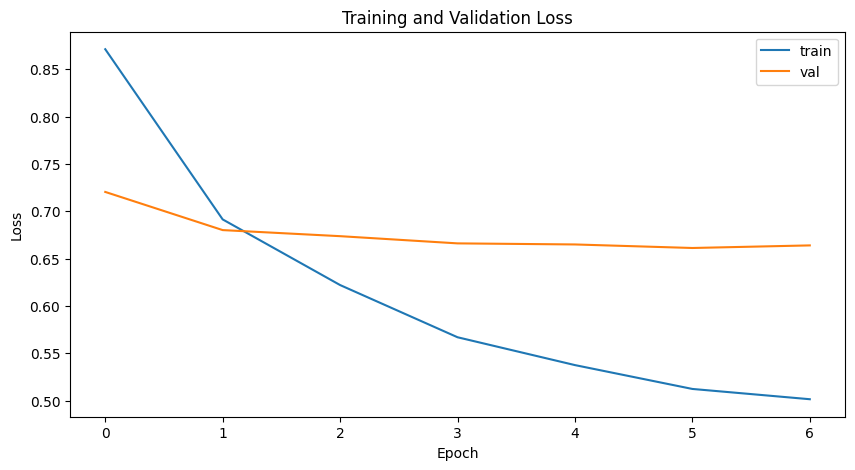

  0%|          | 0/98 [00:00<?, ?it/s]

Test loss 0.6302928048737195 Test F1 0.7386314300473608 Test accuracy 0.7455242966751918


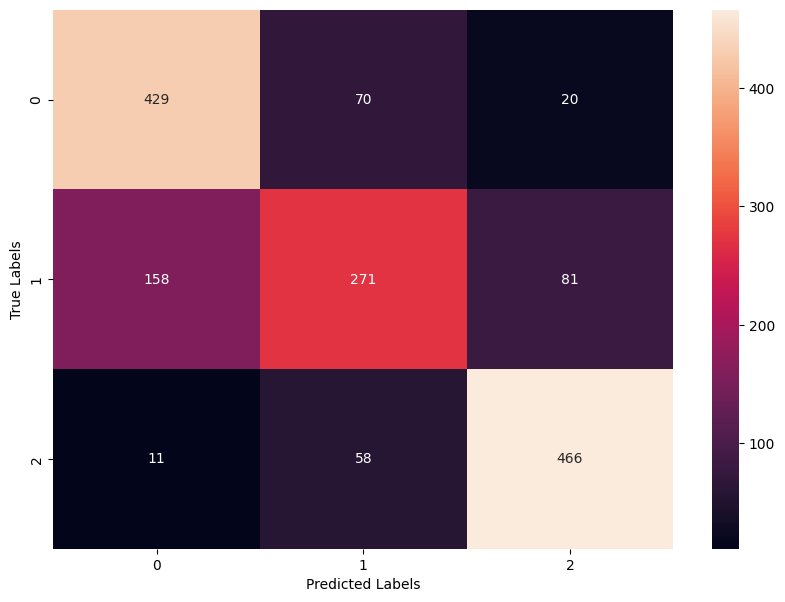

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluate on test data
test_dataset = FarsTailDataset(test_data, tokenizer, max_length=128)
test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_loss, test_predictions, test_real_values = eval_model(
    model,
    test_data_loader,
    device
)

test_f1 = f1_score(test_real_values, test_predictions, average='weighted')
test_acc = accuracy_score(test_real_values, test_predictions)
conf_matrix = confusion_matrix(test_real_values, test_predictions)

print(f'Test loss {test_loss} Test F1 {test_f1} Test accuracy {test_acc}')

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Freezing methods

In [ ]:
class NLIModel_fr(nn.Module):
    def __init__(self, model_type, freeze_approach):
        super(NLIModel_fr, self).__init__()
        self.transformer = AutoModel.from_pretrained(model_type)

        # Freeze layers based on the specified approach
        if freeze_approach == 1:
            # Freeze the first 9 layers
            for param in self.transformer.encoder.layer[:9].parameters():
                param.requires_grad = False
        elif freeze_approach == 2:
            # Freeze all layers except the last transformer layer and the embedding layer
            for param in self.transformer.encoder.layer[:-1].parameters():
                param.requires_grad = False

        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(self.transformer.config.hidden_size, 3)  # 3 classes for NLI

    def forward(self, input_ids, attention_mask):
        transformer_out = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        output = transformer_out[1]  # Use the pooled output
        output = self.drop(output)
        return self.fc(output)

## Approach 1: Freeze first 9 layers

In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model_approach_1 = NLIModel_fr(model_type=model_type, freeze_approach=1).to(device)

epoches = 7

optimizer = AdamW(model_approach_1.parameters(), lr=2e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []
best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model_approach_1,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model_approach_1,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model_approach_1.state_dict(), 'best_model_state_1.bin')
        best_accuracy = val_acc


pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0445333763793274 Val loss 0.9467960049196616 Val F1 0.4960164165043282 Val accuracy 0.5458685751463891
Epoch 2/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9465081568602677 Val loss 0.8682345029005071 Val F1 0.560315136929342 Val accuracy 0.590110605074821
Epoch 3/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8843285109970596 Val loss 0.8246528069997571 Val F1 0.5747977672882294 Val accuracy 0.605074821080026
Epoch 4/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8495977497362829 Val loss 0.7966284727312855 Val F1 0.5742950545087698 Val accuracy 0.6076772934287573
Epoch 5/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8220664706203964 Val loss 0.7849119170424864 Val F1 0.5971809449514638 Val accuracy 0.6180871828236825
Epoch 6/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8080279759653322 Val loss 0.7808101453731969 Val F1 0.598050614055442 Val accuracy 0.6187378009108653
Epoch 7/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8035922529278221 Val loss 0.7780168658679294 Val F1 0.6019224597453643 Val accuracy 0.6206896551724138


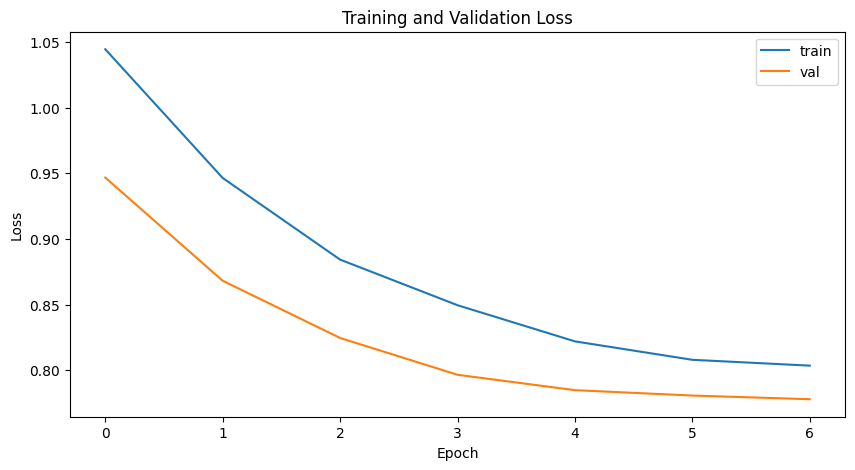

  0%|          | 0/98 [00:00<?, ?it/s]

Test loss 0.7753676157824847 Test F1 0.6121511707381221 Test accuracy 0.6323529411764706


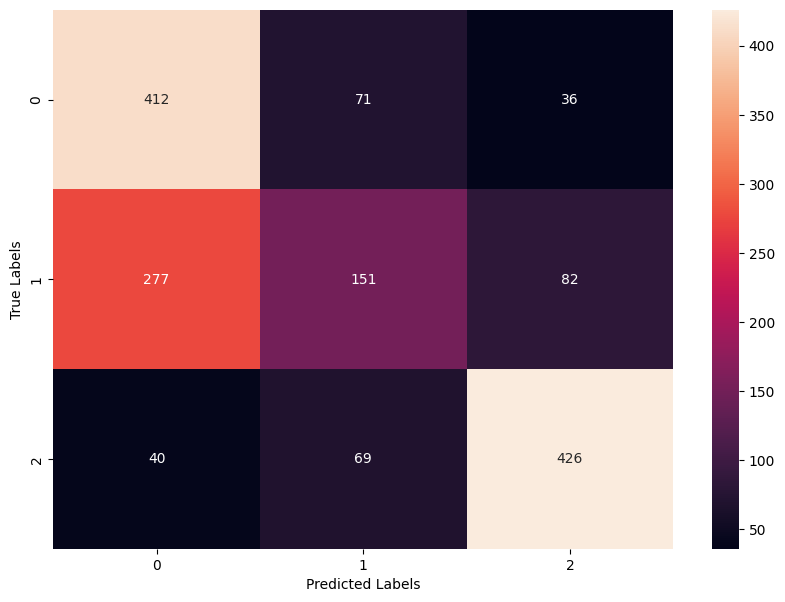

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate on test data
test_dataset = FarsTailDataset(test_data, tokenizer, max_length=128)
test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_loss, test_predictions, test_real_values = eval_model(
    model_approach_1,
    test_data_loader,
    device
)

test_f1 = f1_score(test_real_values, test_predictions, average='weighted')
test_acc = accuracy_score(test_real_values, test_predictions)
conf_matrix = confusion_matrix(test_real_values, test_predictions)

print(f'Test loss {test_loss} Test F1 {test_f1} Test accuracy {test_acc}')

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


## Approach 2: Freeze all except last layer and embedding layer

In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model_approach_2 = NLIModel_fr(model_type=model_type, freeze_approach=2).to(device)

epoches = 7

optimizer = AdamW(model_approach_2.parameters(), lr=2e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []
best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model_approach_2,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model_approach_2,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model_approach_2.state_dict(), 'best_model_state_2.bin')
        best_accuracy = val_acc


Epoch 1/7
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0902847977784964 Val loss 1.0489964454444414 Val F1 0.4457986984567875 Val accuracy 0.46324007807417045
Epoch 2/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0483583817115196 Val loss 1.0236485366968764 Val F1 0.44862842918656803 Val accuracy 0.47950553025374104
Epoch 3/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0295261435456329 Val loss 1.0034430444855051 Val F1 0.4658054160243801 Val accuracy 0.5022771633051398
Epoch 4/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0113792684052016 Val loss 0.9897254422767875 Val F1 0.5004972755168201 Val accuracy 0.5159401431359791
Epoch 5/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0009588562525236 Val loss 0.97957746515569 Val F1 0.4872816588148286 Val accuracy 0.5146389069616135
Epoch 6/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.988855561712286 Val loss 0.9742916257111067 Val F1 0.4887635957313418 Val accuracy 0.5198438516590761
Epoch 7/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9872650227703891 Val loss 0.9722143933945095 Val F1 0.48916490803301854 Val accuracy 0.5230969420949902


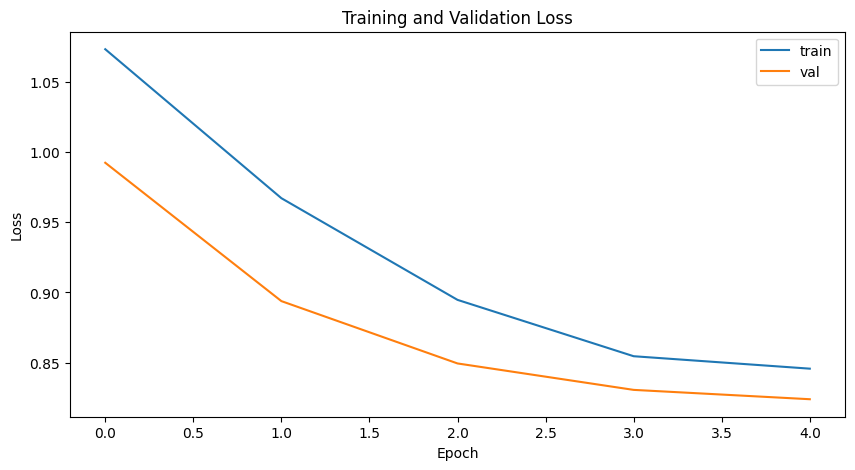

  0%|          | 0/98 [00:00<?, ?it/s]

Test loss 0.9563349868570056 Test F1 0.5165110981158988 Test accuracy 0.5415601023017903


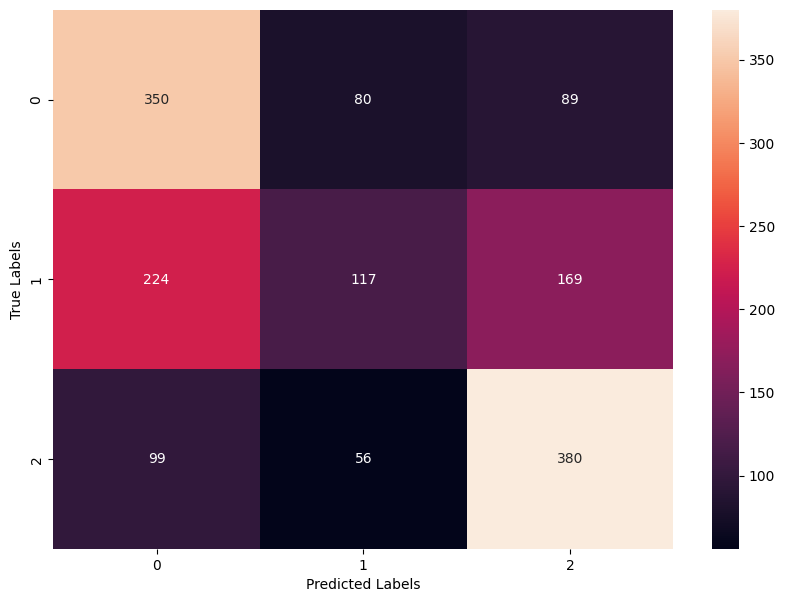

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Evaluate on test data
test_dataset = FarsTailDataset(test_data, tokenizer, max_length=128)
test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_loss, test_predictions, test_real_values = eval_model(
    model_approach_2,
    test_data_loader,
    device
)

test_f1 = f1_score(test_real_values, test_predictions, average='weighted')
test_acc = accuracy_score(test_real_values, test_predictions)
conf_matrix = confusion_matrix(test_real_values, test_predictions)

print(f'Test loss {test_loss} Test F1 {test_f1} Test accuracy {test_acc}')

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Just 9 Layers

In [ ]:
class NLIModel9Layers(nn.Module):
    def __init__(self, model_type):
        super(NLIModel9Layers, self).__init__()
        full_model = AutoModel.from_pretrained(model_type)

        # Keep only the first 9 layers of the transformer
        self.transformer = full_model
        self.transformer.encoder.layer = nn.ModuleList([layer for layer in full_model.encoder.layer[:9]])

        self.drop = nn.Dropout(p=0.3)
        self.fc = nn.Linear(full_model.config.hidden_size, 3)  # 3 classes for NLI

    def forward(self, input_ids, attention_mask):
        transformer_out = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        output = transformer_out[1]  # Use the pooled output
        output = self.drop(output)
        return self.fc(output)


In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model = NLIModel9Layers(model_type=model_type).to(device)

epoches = 7

optimizer = AdamW(model.parameters(), lr=2e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []

train_accs = []
val_accs = []

best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8908403657294892 Val loss 0.7508653639671728 Val F1 0.6449052488341394 Val accuracy 0.6519193233571894
Epoch 2/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.7255483072537642 Val loss 0.7003126006919084 Val F1 0.6669147725236575 Val accuracy 0.6720884840598569
Epoch 3/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.6626721495455438 Val loss 0.6955578335244017 Val F1 0.6560016995281637 Val accuracy 0.6714378659726741
Epoch 4/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.6158042407952822 Val loss 0.6802706797559237 Val F1 0.6897548160488407 Val accuracy 0.69355888093689
Epoch 5/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5778176768467976 Val loss 0.686408223718712 Val F1 0.6821193387460386 Val accuracy 0.690305790500976
Epoch 6/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5580187809336317 Val loss 0.6843750870680994 Val F1 0.6872233116277883 Val accuracy 0.6929082628497072
Epoch 7/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.5484396178316284 Val loss 0.6836178266856167 Val F1 0.6899140860785041 Val accuracy 0.6961613532856213


In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model = NLIModel(model_type=model_type).to(device)

epoches = 5

optimizer = AdamW(model.parameters(), lr=1e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []

train_accs = []
val_accs = []

best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc



Epoch 1/5
----------


/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9489808421868544 Val loss 0.7969061034856383 Val F1 0.594030919184339 Val accuracy 0.6141834743005855
Epoch 2/5
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8141039519519596 Val loss 0.7675145011894482 Val F1 0.6017608317169592 Val accuracy 0.6258945998698764
Epoch 3/5
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.7719879343614473 Val loss 0.7421958294418669 Val F1 0.6245968599781478 Val accuracy 0.6434612882238127
Epoch 4/5
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.7464060925520384 Val loss 0.734485341408818 Val F1 0.6318883615457421 Val accuracy 0.6480156148340924
Epoch 5/5
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.7267377846188597 Val loss 0.7319327408505469 Val F1 0.6306710634360203 Val accuracy 0.6454131424853611


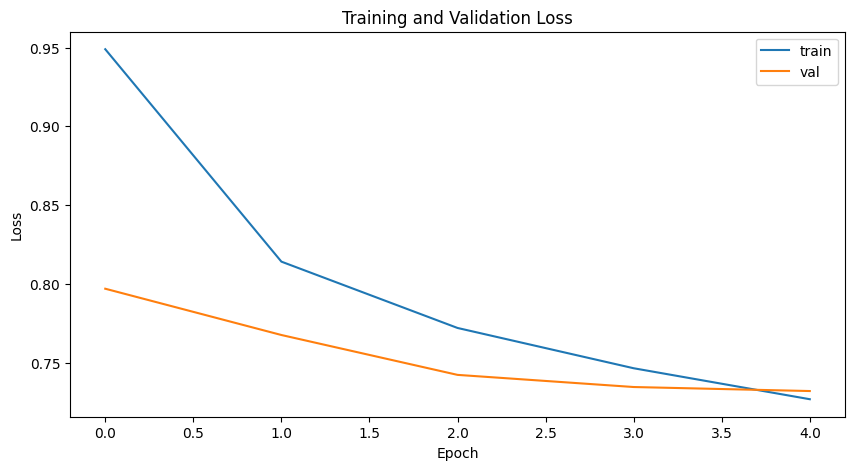

  0%|          | 0/98 [00:00<?, ?it/s]

Test loss 0.7039079702630335 Test F1 0.6572683331394833 Test accuracy 0.6745524296675192


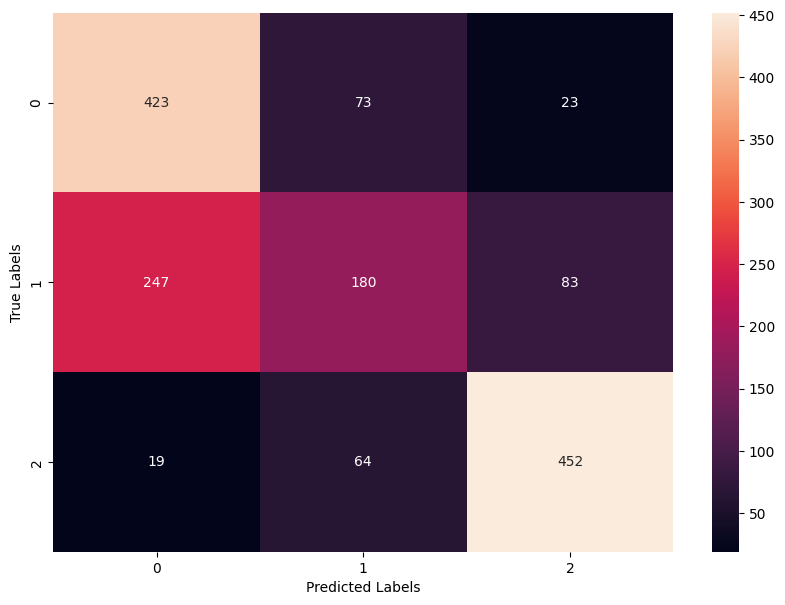

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluate on test data
test_dataset = FarsTailDataset(test_data, tokenizer, max_length=128)
test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_loss, test_predictions, test_real_values = eval_model(
    model,
    test_data_loader,
    device
)

test_f1 = f1_score(test_real_values, test_predictions, average='weighted')
test_acc = accuracy_score(test_real_values, test_predictions)
conf_matrix = confusion_matrix(test_real_values, test_predictions)

print(f'Test loss {test_loss} Test F1 {test_f1} Test accuracy {test_acc}')

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


# Pruning

In [ ]:
from transformers import BertConfig

class PrunedNLIModel(NLIModel):
    def __init__(self, model_type):
        super(PrunedNLIModel, self).__init__(model_type)
        self.prune_heads()

    def prune_heads(self):
        # Get the number of attention heads
        num_heads = self.transformer.config.num_attention_heads
        num_layers = self.transformer.config.num_hidden_layers

        # Calculate the number of heads to prune (50%)
        heads_to_prune = int(num_heads * 0.5)

        # Prune heads in each layer
        for layer in range(num_layers):
            # Randomly select heads to prune
            heads = torch.randperm(num_heads)[:heads_to_prune]
            self.transformer.prune_heads({layer: heads.tolist()})


In [ ]:
# Configuration for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_type = "HooshvareLab/bert-base-parsbert-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_type)

train_dataset = FarsTailDataset(train_data, tokenizer, max_length=256)
val_dataset = FarsTailDataset(val_data, tokenizer, max_length=256)

train_data_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_data_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

model = PrunedNLIModel(model_type=model_type).to(device)

epoches = 7

optimizer = AdamW(model.parameters(), lr=1e-6, correct_bias=False)
total_steps = len(train_data_loader) * epoches

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps=total_steps
)

# Begin training and evaluation
train_losses = []
val_losses = []

train_accs = []
val_accs = []

best_accuracy = 0

for epoch in range(epoches):
    print(f'Epoch {epoch + 1}/{epoches}')
    print('-' * 10)

    train_loss = train_epoch(
        model,
        train_data_loader,
        optimizer,
        device,
        scheduler
    )

    val_loss, predictions, real_values = eval_model(
        model,
        val_data_loader,
        device
    )

    val_f1 = f1_score(real_values, predictions, average='weighted')
    val_acc = accuracy_score(real_values, predictions)

    print(f'Train loss {train_loss} Val loss {val_loss} Val F1 {val_f1} Val accuracy {val_acc}')

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    if val_acc > best_accuracy:
        torch.save(model.state_dict(), 'best_model_state.bin')
        best_accuracy = val_acc



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/434 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.22M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/654M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.1003751648651374 Val loss 1.0581023269092913 Val F1 0.42080730469397526 Val accuracy 0.4209499024072869
Epoch 2/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 1.0454834834559934 Val loss 0.9863629433297619 Val F1 0.4690013489043507 Val accuracy 0.5198438516590761
Epoch 3/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9905510586696666 Val loss 0.9316517096204856 Val F1 0.5013600311188514 Val accuracy 0.5413142485361093
Epoch 4/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9515103530097794 Val loss 0.9050957185705912 Val F1 0.5442577537605543 Val accuracy 0.560832791151594
Epoch 5/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.9224868373556452 Val loss 0.8901338995117503 Val F1 0.5253877036037272 Val accuracy 0.556929082628497
Epoch 6/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.902386071393778 Val loss 0.8729627654724514 Val F1 0.5547339919735289 Val accuracy 0.5764476252439817
Epoch 7/7
----------


  0%|          | 0/455 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

Train loss 0.8939708536797828 Val loss 0.8776356802158749 Val F1 0.5429934894345716 Val accuracy 0.5653871177618738


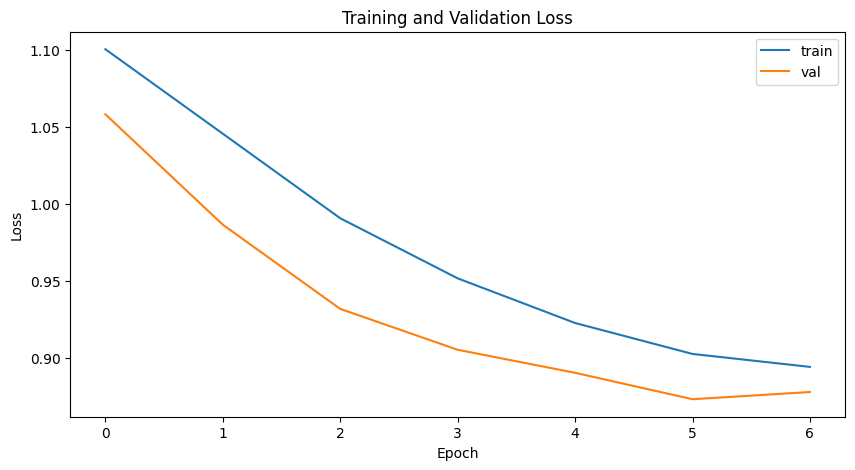

  0%|          | 0/98 [00:00<?, ?it/s]

Test loss 0.87238588625071 Test F1 0.5531197099082906 Test accuracy 0.5786445012787724


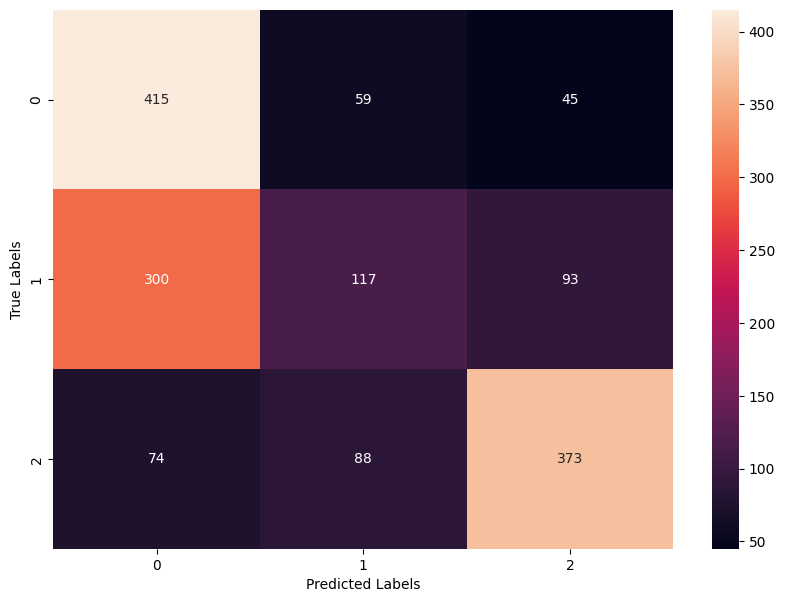

In [ ]:
# Plotting training and validation losses
plt.figure(figsize=(10, 5))
plt.title("Training and Validation Loss")
plt.plot(train_losses, label="train")
plt.plot(val_losses, label="val")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


# Evaluate on test data
test_dataset = FarsTailDataset(test_data, tokenizer, max_length=128)
test_data_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

test_loss, test_predictions, test_real_values = eval_model(
    model,
    test_data_loader,
    device
)

test_f1 = f1_score(test_real_values, test_predictions, average='weighted')
test_acc = accuracy_score(test_real_values, test_predictions)
conf_matrix = confusion_matrix(test_real_values, test_predictions)

print(f'Test loss {test_loss} Test F1 {test_f1} Test accuracy {test_acc}')

# Plotting confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
